In [1]:

library(tidyverse)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [14]:
# Section 0
# Part 2
# prepare data.

# download zip file
zipFileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
temp <- tempfile()
download.file(zipFileUrl, temp)
rawData <- read.csv(unz(temp, "hour.csv"))
unlink(temp)
# above code consult: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data
# head(rawData)
# tail(rawData)


In [15]:
BikeSharingData <- rawData %>%
    mutate(dteday = as.Date(dteday)) %>%
    group_by(dteday) %>%
    summarize(cnt = sum(cnt), workingday=mean(workingday)) %>%
    ungroup() %>%
    select(dteday, workingday, cnt) %>%
    mutate(isworkingday = (workingday == 1)) %>%
    mutate(isworkingday = as.factor(isworkingday)) %>%
    select(dteday, isworkingday, cnt)


nrow(BikeSharingData)
head(BikeSharingData)


[1] 731

dteday,isworkingday,cnt
<date>,<fct>,<int>
2011-01-01,FALSE,985
2011-01-02,FALSE,801
2011-01-03,TRUE,1349
2011-01-04,TRUE,1562
2011-01-05,TRUE,1600
2011-01-06,TRUE,1606


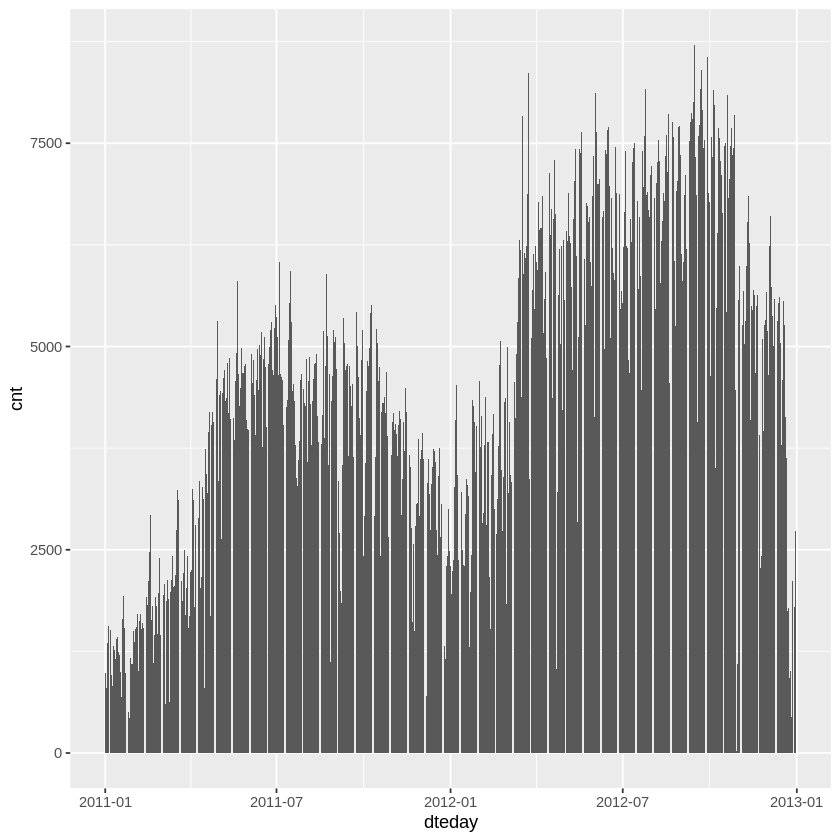

In [16]:
ggplot(BikeSharingData, aes(x = dteday, y = cnt)) +
  geom_bar(stat = "identity")

There is a clear trend, we may need ask TA to make sure we can use this data for the project.

We may need to think carefully about what is our population and the sample.